In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import DenseNet121, ResNet50, VGG16, EfficientNetB7, InceptionV3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Conv3D, LayerNormalization, BatchNormalization, Dropout, MaxPooling3D, MaxPooling2D, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import keras.backend as k

In [2]:
k.clear_session()

In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from random import randint
import shutil

# Define paths
INPUT_DIR = '/kaggle/input/nitr-dataset3/nitr-dataset'
DATADIR = '/kaggle/working/nitr-lowlight'

CATEGORIES = {
    'BBA': ['BBA back', 'BBA front', 'BBA left'],
    'BM BT': ['BM BT front', 'BM BT left'],
    'BPCL': ['BPCL front'],
    'CSE dept': ['CSE dept front', 'CSE dept right', 'CSE dept back'],
    'Electrical dept': ['Electrical dept back', 'Electrical dept front', 'Electrical dept left', 'Electrical dept right'],
    'Golden jubilee': ['Golden jubilee back', 'Golden jubilee front', 'Golden jubilee left', 'Golden jubilee right'],
    'LA1': ['LA 1 front', 'LA 1 left', 'LA 1 right'],
    'LA2': ['LA 2 back', 'LA 2 front', 'LA 2 right'],
    'Main building': ['Main building front'],
    'Mech dept': ['Mech dept back', 'Mech dept front']
}

# Augmentation functions
def apply_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def apply_flip(image):
    return cv2.flip(image, 1)  # Horizontal flip

def apply_rotation(image, angle=30):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def apply_zoom(image, zoom_factor=1.2):
    h, w = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    resized = cv2.resize(image, (new_w, new_h))
    start_h, start_w = (new_h - h) // 2, (new_w - w) // 2
    return resized[start_h:start_h + h, start_w:start_w + w]

# Save augmented images in output directory structure
def save_augmented_images(output_folder, image_name, augmentations):
    base_name = os.path.splitext(image_name)[0]
    saved_files = []
    for idx, aug_img in enumerate(augmentations):
        aug_image_name = f"{base_name}_aug_{idx + 1}.jpg"
        aug_image_path = os.path.join(output_folder, aug_image_name)
        
        # Save and collect saved file paths for logging
        if cv2.imwrite(aug_image_path, aug_img):
            saved_files.append(aug_image_path)
        else:
            print(f"Failed to save: {aug_image_path}")
    
    return saved_files

# Main function to iterate over each subfolder and apply augmentations
for category, subfolders in CATEGORIES.items():
    for subfolder in subfolders:
        input_folder_path = os.path.join(INPUT_DIR, subfolder)
        output_folder_path = os.path.join(DATADIR, subfolder)

        # Create corresponding output directory
        os.makedirs(output_folder_path, exist_ok=True)

        # Check if input subfolder exists
        if not os.path.exists(input_folder_path):
            print(f"Directory {input_folder_path} does not exist, skipping...")
            continue

        print(f"\nProcessing folder: {subfolder}\n{'=' * 30}")
        
        # Initialize list to keep track of saved images in this folder
        all_saved_files = []
        
        # Copy original images to output directory and apply augmentations
        for image_name in tqdm(os.listdir(input_folder_path)):
            if image_name.lower().endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(input_folder_path, image_name)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Could not read image: {image_path}")
                    continue

                # Copy original image to the output folder
                output_image_path = os.path.join(output_folder_path, image_name)
                shutil.copy(image_path, output_image_path)
                
                # Apply augmentations
                augmentations = [
                    apply_blur(image),
                    apply_flip(image),
                    apply_rotation(image, angle=randint(15, 45)),  # Rotate with a random angle
                    apply_zoom(image, zoom_factor=1.2)
                ]

                # Save augmented images in the output folder
                saved_files = save_augmented_images(output_folder_path, image_name, augmentations)
                all_saved_files.extend(saved_files)

        # Print all saved files for this folder at once
        if all_saved_files:
            print(f"\nSaved images in folder '{subfolder}':")
            for file_path in all_saved_files:
                print(file_path)
            print("\n" + "=" * 50 + "\n")

print("\nData augmentation complete. All images saved to the output directory.")



Processing folder: BBA back


100%|██████████| 40/40 [00:22<00:00,  1.79it/s]



Saved images in folder 'BBA back':
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072048545_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072048545_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072048545_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072048545_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072020038_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072020038_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072020038_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072020038_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20221202_155227196_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20221202_155227196_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20221202_155227196_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20221202_155227196_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA back/IMG_20230311_072034450_aug_1.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 40/40 [00:21<00:00,  1.89it/s]



Saved images in folder 'BBA front':
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072530325_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072530325_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072530325_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072530325_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072521321_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072521321_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072521321_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072521321_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072532597_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072532597_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072532597_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20230311_072532597_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA front/IMG_20221202_154937737_aug_1.jpg
/kaggle/workin

100%|██████████| 40/40 [00:21<00:00,  1.90it/s]



Saved images in folder 'BBA left':
/kaggle/working/nitr-lowlight/BBA left/IMG_20221202_155051521_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20221202_155051521_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20221202_155051521_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20221202_155051521_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072215832_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072215832_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072215832_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072215832_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072213788_aug_1.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072213788_aug_2.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072213788_aug_3.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072213788_aug_4.jpg
/kaggle/working/nitr-lowlight/BBA left/IMG_20230311_072239245_aug_1.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 20/20 [00:10<00:00,  1.91it/s]



Saved images in folder 'BM BT front':
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150847156_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150847156_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150847156_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150847156_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150814113_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150814113_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150814113_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150814113_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150835695_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150835695_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150835695_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150835695_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT front/IMG_20221202_150834

100%|██████████| 15/15 [00:08<00:00,  1.84it/s]



Saved images in folder 'BM BT left':
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152808405_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152808405_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152808405_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152808405_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152812368_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152812368_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152812368_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152812368_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152813923_aug_1.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152813923_aug_2.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152813923_aug_3.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152813923_aug_4.jpg
/kaggle/working/nitr-lowlight/BM BT left/IMG_20221202_152803326_aug_1.jpg


100%|██████████| 40/40 [00:20<00:00,  1.96it/s]



Saved images in folder 'BPCL front':
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161843941_aug_1.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161843941_aug_2.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161843941_aug_3.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161843941_aug_4.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161836880_aug_1.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161836880_aug_2.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161836880_aug_3.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20221202_161836880_aug_4.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20230311_071237661_aug_1.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20230311_071237661_aug_2.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20230311_071237661_aug_3.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20230311_071237661_aug_4.jpg
/kaggle/working/nitr-lowlight/BPCL front/IMG_20230311_071302775_aug_1.jpg


100%|██████████| 40/40 [00:22<00:00,  1.74it/s]



Saved images in folder 'CSE dept front':
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154638233_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154638233_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154638233_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154638233_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20230311_064748883_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20230311_064748883_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20230311_064748883_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20230311_064748883_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154711368_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154711368_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154711368_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept front/IMG_20221202_154711368_aug_4.jpg
/kaggle/working/nitr-l

100%|██████████| 40/40 [00:21<00:00,  1.87it/s]



Saved images in folder 'CSE dept right':
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154439342_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154439342_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154439342_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154439342_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20230311_065324709_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20230311_065324709_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20230311_065324709_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20230311_065324709_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154516228_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154516228_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154516228_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept right/IMG_20221202_154516228_aug_4.jpg
/kaggle/working/nitr-l

100%|██████████| 40/40 [00:19<00:00,  2.00it/s]



Saved images in folder 'CSE dept back':
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153456246_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153456246_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153456246_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153456246_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153535540_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153535540_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153535540_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153535540_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153547802_aug_1.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153547802_aug_2.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153547802_aug_3.jpg
/kaggle/working/nitr-lowlight/CSE dept back/IMG_20221202_153547802_aug_4.jpg
/kaggle/working/nitr-lowlight/CSE d

100%|██████████| 40/40 [00:19<00:00,  2.01it/s]



Saved images in folder 'Electrical dept back':
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153621954_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153621954_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153621954_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153621954_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153638908_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153638908_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153638908_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153638908_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153619022_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153619022_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept back/IMG_20221202_153619022_aug_3.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 40/40 [00:21<00:00,  1.90it/s]



Saved images in folder 'Electrical dept front':
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073422567_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073422567_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073422567_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073422567_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073429609_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073429609_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073429609_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073429609_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073427054_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073427054_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept front/IMG_20230311_073427054_aug_3.jpg
/kaggle/working/

100%|██████████| 40/40 [00:20<00:00,  1.95it/s]



Saved images in folder 'Electrical dept left':
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072935030_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072935030_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072935030_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072935030_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072937303_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072937303_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072937303_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20230311_072937303_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20221202_153849946_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20221202_153849946_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept left/IMG_20221202_153849946_aug_3.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 35/35 [00:17<00:00,  1.97it/s]



Saved images in folder 'Electrical dept right':
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154210286_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154210286_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154210286_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154210286_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20230311_074933115_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20230311_074933115_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20230311_074933115_aug_3.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20230311_074933115_aug_4.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154214088_aug_1.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154214088_aug_2.jpg
/kaggle/working/nitr-lowlight/Electrical dept right/IMG_20221202_154214088_aug_3.jpg
/kaggle/working/

100%|██████████| 40/40 [00:20<00:00,  1.97it/s]



Saved images in folder 'Golden jubilee back':
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20230311_070625745_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20230311_070625745_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20230311_070625745_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20230311_070625745_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152230392_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152230392_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152230392_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152230392_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152223240_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152223240_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee back/IMG_20221202_152223240_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jub

100%|██████████| 40/40 [00:19<00:00,  2.01it/s]



Saved images in folder 'Golden jubilee front':
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20221202_153050185_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20221202_153050185_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20221202_153050185_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20221202_153050185_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070027071_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070027071_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070027071_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070027071_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070043817_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070043817_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee front/IMG_20230311_070043817_aug_3.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 40/40 [00:20<00:00,  1.98it/s]



Saved images in folder 'Golden jubilee left':
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20230311_071011063_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20230311_071011063_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20230311_071011063_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20230311_071011063_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152908523_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152908523_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152908523_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152908523_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152905687_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152905687_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee left/IMG_20221202_152905687_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jub

100%|██████████| 40/40 [00:19<00:00,  2.10it/s]



Saved images in folder 'Golden jubilee right':
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153246348_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153246348_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153246348_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153246348_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20230311_070314486_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20230311_070314486_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20230311_070314486_aug_3.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20230311_070314486_aug_4.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153243624_aug_1.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153243624_aug_2.jpg
/kaggle/working/nitr-lowlight/Golden jubilee right/IMG_20221202_153243624_aug_3.jpg
/kaggle/working/nitr-lowligh

100%|██████████| 20/20 [00:10<00:00,  1.95it/s]



Saved images in folder 'LA 1 front':
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150807134_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150807134_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150807134_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150807134_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150734056_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150734056_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150734056_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150734056_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150804073_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150804073_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150804073_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150804073_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 front/IMG_20221202_150730546_aug_1.jpg


100%|██████████| 20/20 [00:11<00:00,  1.76it/s]



Saved images in folder 'LA 1 left':
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151017388_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151017388_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151017388_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151017388_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151026613_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151026613_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151026613_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151026613_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151018652_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151018652_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151018652_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151018652_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 left/IMG_20221202_151048081_aug_1.jpg
/kaggle/workin

100%|██████████| 20/20 [00:10<00:00,  1.98it/s]



Saved images in folder 'LA 1 right':
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152631337_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152631337_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152631337_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152631337_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152608186_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152608186_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152608186_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152608186_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152637171_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152637171_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152637171_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152637171_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 1 right/IMG_20221202_152634125_aug_1.jpg


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]



Saved images in folder 'LA 2 back':
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152434703_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152434703_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152434703_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152434703_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152411582_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152411582_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152411582_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152411582_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152414277_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152414277_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152414277_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152414277_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 back/IMG_20221202_152423891_aug_1.jpg
/kaggle/workin

100%|██████████| 20/20 [00:11<00:00,  1.72it/s]



Saved images in folder 'LA 2 front':
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151407323_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151407323_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151407323_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151407323_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151347214_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151347214_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151347214_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151347214_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151418334_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151418334_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151418334_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151418334_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 front/IMG_20221202_151403420_aug_1.jpg


100%|██████████| 15/15 [00:08<00:00,  1.86it/s]



Saved images in folder 'LA 2 right':
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151217942_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151217942_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151217942_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151217942_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151212644_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151212644_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151212644_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151212644_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151216434_aug_1.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151216434_aug_2.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151216434_aug_3.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151216434_aug_4.jpg
/kaggle/working/nitr-lowlight/LA 2 right/IMG_20221202_151209817_aug_1.jpg


100%|██████████| 40/40 [00:21<00:00,  1.86it/s]



Saved images in folder 'Main building front':
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071822493_aug_1.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071822493_aug_2.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071822493_aug_3.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071822493_aug_4.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20221202_155741573_aug_1.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20221202_155741573_aug_2.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20221202_155741573_aug_3.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20221202_155741573_aug_4.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071814868_aug_1.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071814868_aug_2.jpg
/kaggle/working/nitr-lowlight/Main building front/IMG_20230311_071814868_aug_3.jpg
/kaggle/working/nitr-lowlight/Main build

100%|██████████| 40/40 [00:20<00:00,  1.95it/s]



Saved images in folder 'Mech dept back':
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20230311_070824127_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20230311_070824127_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20230311_070824127_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20230311_070824127_aug_4.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152132889_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152132889_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152132889_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152132889_aug_4.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152112323_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152112323_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152112323_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept back/IMG_20221202_152112323_aug_4.jpg
/kaggle/working/nitr-l

100%|██████████| 40/40 [00:21<00:00,  1.88it/s]


Saved images in folder 'Mech dept front':
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151542968_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151542968_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151542968_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151542968_aug_4.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20230311_074612059_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20230311_074612059_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20230311_074612059_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20230311_074612059_aug_4.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151603152_aug_1.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151603152_aug_2.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151603152_aug_3.jpg
/kaggle/working/nitr-lowlight/Mech dept front/IMG_20221202_151603152_aug_4.jpg
/kaggle/w

Checking path: /kaggle/working/nitr-lowlight/BBA back


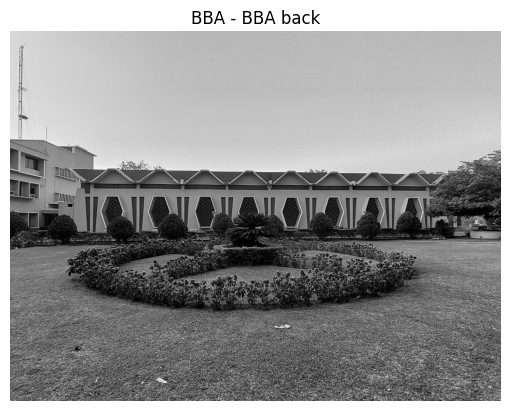

Checking path: /kaggle/working/nitr-lowlight/BBA front


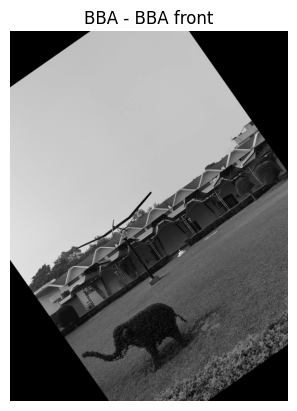

Checking path: /kaggle/working/nitr-lowlight/BBA left


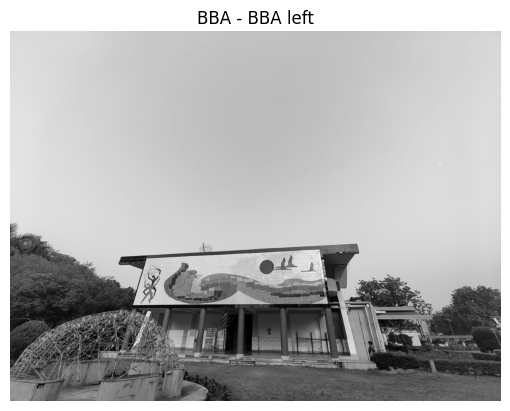

In [4]:
for category, subfolders in CATEGORIES.items():
    for subfolder in subfolders:
        path = os.path.join(DATADIR, subfolder)
        print(f"Checking path: {path}")  # Debug line to see the full path
        if os.path.exists(path):  # Check if the directory exists
            for img in os.listdir(path):
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
                plt.imshow(img_array, cmap='gray')  # Display in grayscale
                plt.title(f"{category} - {subfolder}")
                plt.axis('off')  # Hide the axis
                plt.show()
                break  # Display only one image per subfolder
        else:
            print(f"Directory not found: {path}")
    break 

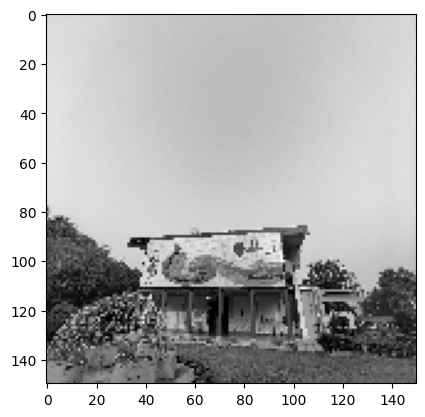

In [5]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for class_num, (category, subfolders) in enumerate(CATEGORIES.items()):
        for subfolder in subfolders:
            path = os.path.join(DATADIR, subfolder)
            print(f"Processing folder: {path}")  # Debug line to see which folder is being processed
            if os.path.exists(path):  # Check if the directory exists
                for img in os.listdir(path):
                    try:
                        img_path = os.path.join(path, img)
                        img_array = cv2.imread(img_path)
                        
                        if img_array is None:
                            print(f"Failed to load image: {img_path}")
                            continue  # Skip images that couldn't be loaded

                        # Convert to grayscale if the image is not already in grayscale
                        if len(img_array.shape) == 3:  # Check if it's an RGB image
                            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

                        # Resize the image
                        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                        new_array = np.expand_dims(new_array, axis=-1)

                        # Append the processed image and its class label
                        training_data.append([new_array, class_num])
                        
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")  # Optional: print the error for debugging
            else:
                print(f"Directory not found: {path}")

create_training_data()

# Optionally, print out the number of items in training data to verify
print(f"Total training samples: {len(training_data)}")


Processing folder: /kaggle/working/nitr-lowlight/BBA back
Processing folder: /kaggle/working/nitr-lowlight/BBA front
Processing folder: /kaggle/working/nitr-lowlight/BBA left
Processing folder: /kaggle/working/nitr-lowlight/BM BT front
Processing folder: /kaggle/working/nitr-lowlight/BM BT left
Processing folder: /kaggle/working/nitr-lowlight/BPCL front
Processing folder: /kaggle/working/nitr-lowlight/CSE dept front
Processing folder: /kaggle/working/nitr-lowlight/CSE dept right
Processing folder: /kaggle/working/nitr-lowlight/CSE dept back
Processing folder: /kaggle/working/nitr-lowlight/Electrical dept back
Processing folder: /kaggle/working/nitr-lowlight/Electrical dept front
Processing folder: /kaggle/working/nitr-lowlight/Electrical dept left
Processing folder: /kaggle/working/nitr-lowlight/Electrical dept right
Processing folder: /kaggle/working/nitr-lowlight/Golden jubilee back
Processing folder: /kaggle/working/nitr-lowlight/Golden jubilee front
Processing folder: /kaggle/worki

In [7]:
# Shuffling the training data
import random
random.shuffle(training_data)

In [8]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)

In [9]:
X.shape

(4325, 150, 150, 1)

In [10]:
y.shape

(4325,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_train.shape

(3027, 150, 150, 1)

In [13]:
y_train.shape

(3027,)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train.shape

(3027, 150, 150, 1)

In [16]:
num_classes=10

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
def proposed_model(input_shape=X_train.shape[1:], num_classes=10):
    model = Sequential()
    
    # First Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Second Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Third Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Fourth Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(2, 2), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Fifth Convolutional Block
    model.add(Conv2D(filters=256, kernel_size=(2, 2), padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile Model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [19]:
# from tensorflow.keras.layers import Layer, Softmax, Conv2D
# from tensorflow.keras import backend as K

# from tensorflow.keras.layers import Layer, Softmax, Conv2D, Reshape, Add

# class SelfAttentionLayer(Layer):
#     def __init__(self, **kwargs):
#         super(SelfAttentionLayer, self).__init__(**kwargs)
#         # Define all Conv2D layers here to avoid reinitializing them on each call
#         self.theta_conv = Conv2D(128, kernel_size=(1,1), padding='same')
#         self.phi_conv = Conv2D(128, kernel_size=(1,1), padding='same')
#         self.g_conv = Conv2D(128, kernel_size=(1,1), padding='same')
#         self.output_conv = Conv2D(256, kernel_size=(1,1), padding='same')
#         self.input_proj_conv = Conv2D(256, kernel_size=(1,1), padding='same')
#         self.softmax = Softmax()

#     def call(self, inputs):
#         h, w, c = inputs.shape[1], inputs.shape[2], inputs.shape[3]
        
#         # Theta (query)
#         theta = self.theta_conv(inputs)
#         theta_rsh = Reshape((h * w, 128))(theta)

#         # Phi (key)
#         phi = self.phi_conv(inputs)
#         phi_rsh = Reshape((h * w, 128))(phi)

#         # G (value)
#         g = self.g_conv(inputs)
#         g_rsh = Reshape((h * w, 128))(g)

#         # Self-attention using K.batch_dot
#         theta_phi = K.batch_dot(theta_rsh, phi_rsh, axes=[2, 2])
#         theta_phi = self.softmax(theta_phi)

#         # Weighted sum
#         theta_phi_g = K.batch_dot(theta_phi, g_rsh)
#         theta_phi_g = Reshape((h, w, 128))(theta_phi_g)

#         # Final convolution to adjust the channel dimension
#         theta_phi_g = self.output_conv(theta_phi_g)

#         # Project inputs to match the channel dimensions of theta_phi_g for addition
#         inputs_proj = self.input_proj_conv(inputs)

#         # Add residual connection
#         output_tensor = Add()([theta_phi_g, inputs_proj])
#         return output_tensor


# # Now, integrate this into the proposed model function
# def proposed_model(input_shape=X_train.shape[1:], num_classes=10):
#     inputs = Input(shape=input_shape)
    
#     # First Convolutional Block
#     x = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu', kernel_regularizer=l2(0.01))(inputs)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.3)(x)

#     # Second Convolutional Block
#     x = Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu', kernel_regularizer=l2(0.01))(x)
#     x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
#     x = Dropout(0.3)(x)

#     # Third Convolutional Block
#     x = Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu', kernel_regularizer=l2(0.01))(x)
#     x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
#     x = Dropout(0.3)(x)

#     # Apply Self-Attention after the third block
#     x = SelfAttentionLayer()(x)

#     # Fourth Convolutional Block
#     x = Conv2D(filters=128, kernel_size=(2, 2), padding='Same', activation='relu', kernel_regularizer=l2(0.01))(x)
#     x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
#     x = Dropout(0.3)(x)

#     # Fifth Convolutional Block
#     x = Conv2D(filters=256, kernel_size=(2, 2), padding='Same', activation='relu')(x)
#     x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
#     x = Dropout(0.3)(x)

#     # Fully Connected Layers
#     x = Flatten()(x)
#     x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
#     x = Dropout(0.5)(x)

#     # Output Layer
#     outputs = Dense(num_classes, activation='softmax')(x)
    
#     # Create Model
#     model = Model(inputs=inputs, outputs=outputs)
    
#     # Compile Model
#     optimizer = Adam(learning_rate=0.0001)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model


In [20]:
# # Function to build models with pre-trained architectures
# def pretrained_model(base_model, input_shape=X_train.shape[1:], num_classes=10):
#     input_tensor = Input(shape=input_shape)
#     x = tf.keras.layers.Concatenate()([input_tensor, input_tensor, input_tensor])  # Convert grayscale to 3 channels
#     base_model = base_model(include_top=False, weights='imagenet', input_tensor=x)
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=input_tensor, outputs=predictions)

#     for layer in base_model.layers:
#         layer.trainable = False
        
#     optimizer = Adam(learning_rate=0.0001)
#     model.compile(optimizer='adam', loss = CategoricalCrossentropy, metrics=['accuracy'])
#     return model

In [21]:
models = {
    'Proposed': proposed_model()
    # 'DenseNet121': pretrained_model(DenseNet121),
    # 'ResNet50': pretrained_model(ResNet50),
    # 'VGG16': pretrained_model(VGG16),
    # 'EfficientNetB7': pretrained_model(EfficientNetB7),
    # 'InceptionV3': pretrained_model(InceptionV3)
}
history_dict = {}

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
models['Proposed'].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,624,650 (17.64 MB)

 Trainable params: 4,624,650 (17.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
for model_name, model in models.items():
    print(f"Training {model_name} Model : ")
    
    history = model.fit(X_train, y_train, 
        batch_size=32,  
        validation_data=(X_test, y_test),
        epochs=100,
    )
    
    history_dict[model_name] = history.history

Training Proposed Model : 
Epoch 1/100


I0000 00:00:1732775236.494186     105 service.cc:145] XLA service 0x7890e0012a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732775236.494835     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732775236.494842     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/95 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1441 - loss: 2.3636 

I0000 00:00:1732775249.781930     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 199ms/step - accuracy: 0.1742 - loss: 2.2095 - val_accuracy: 0.2219 - val_loss: 2.2778
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2023 - loss: 2.1599 - val_accuracy: 0.2504 - val_loss: 2.2628
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.2748 - loss: 2.0604 - val_accuracy: 0.3297 - val_loss: 2.1556
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3220 - loss: 1.9503 - val_accuracy: 0.3914 - val_loss: 2.0463
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3464 - loss: 1.8192 - val_accuracy: 0.3675 - val_loss: 1.9926
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3797 - loss: 1.7331 - val_accuracy: 0.3867 - val_loss: 1.9286
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3897 - loss: 1.6896 - val_accuracy: 0.3713 - val_loss: 1.9128
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4068 - loss: 1.6385 - val_accuracy: 0.3891 - val

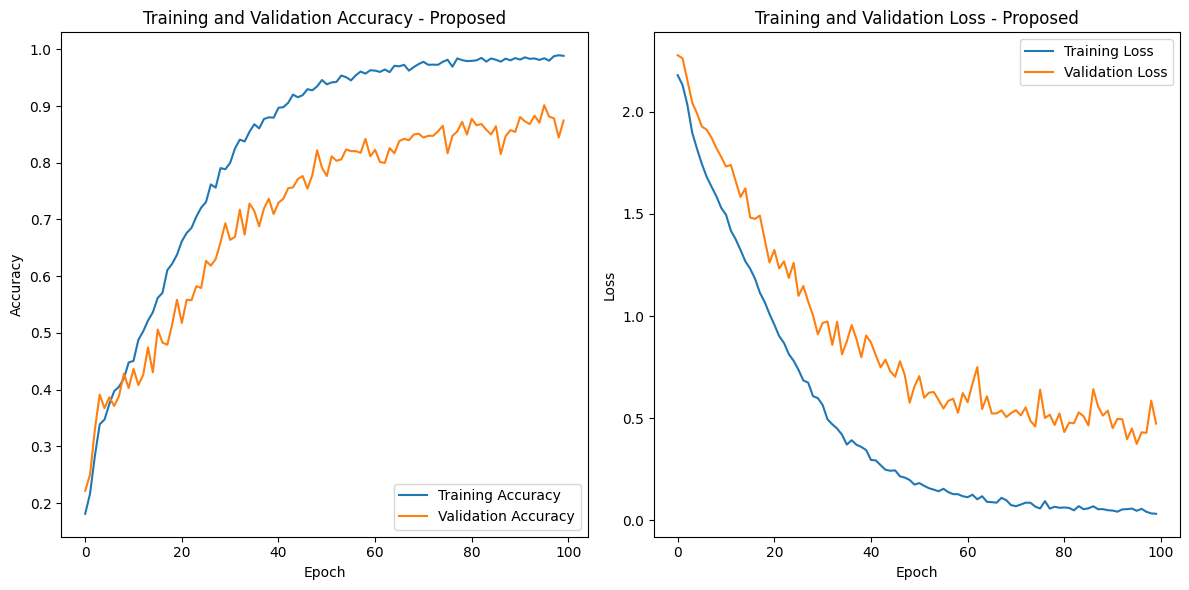

In [24]:
import matplotlib.pyplot as plt

# Iterate through each model's history
for model_name, history in history_dict.items():
    # Extract history metrics
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    
    # Create a new figure
    plt.figure(figsize=(12, 6))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

In [25]:
# Iterate through each model's history
for model_name, history in history_dict.items():
    # Extract history metrics
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    
    # Calculate final metrics
    Accuracy_Score = round(acc[-1] * 100, 2)
    Validation_Score = round(val_acc[-1] * 100, 2)
    Loss_score = round(loss[-1], 2)
    Validation_loss = round(val_loss[-1], 2)
    
    # Print metrics
    print(f"Model: {model_name}")
    print(f"The Accuracy for the model is: {Accuracy_Score}%")
    print(f"The Validation Accuracy for the model is: {Validation_Score}%")
    print(f"The Loss for the model is: {Loss_score}")
    print(f"The Validation Loss for the model is: {Validation_loss}\n")


Model: Proposed
The Accuracy for the model is: 98.84%
The Validation Accuracy for the model is: 87.44%
The Loss for the model is: 0.03
The Validation Loss for the model is: 0.47



41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

Model: Proposed


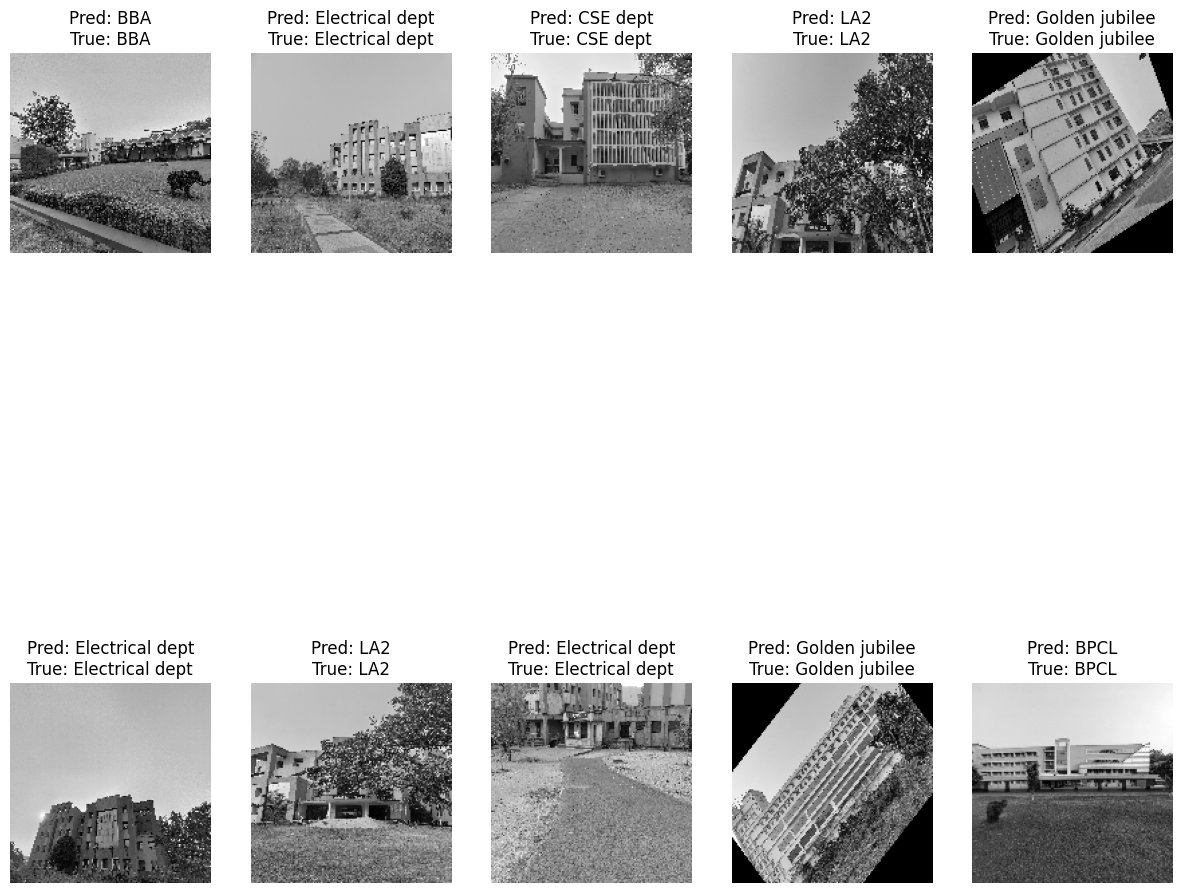

In [26]:
# Flatten categories and subfolders for easier indexing
flat_categories = {i: (category, subfolder) for i, (category, subfolders) in enumerate(CATEGORIES.items()) for subfolder in subfolders}

# Function to map subcategory predictions to main categories
def map_to_main_category(predicted_label):
    for main_category, subcategories in CATEGORIES.items():
        if predicted_label in subcategories:
            return main_category
    return None

# Function to shuffle the test data and labels
def shuffle_test_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    return X[indices], y[indices]

# Iterate over models and make predictions on the test set
for model_name, model in models.items():
    # Shuffle X_test and y_test before each evaluation
    X_test_shuffled, y_test_shuffled = shuffle_test_data(X_test, y_test)
    
    # Predict on shuffled test set
    predictions = model.predict(X_test_shuffled)
    
    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Convert y_test to class labels if it's one-hot encoded
    true_classes = np.argmax(y_test_shuffled, axis=1) if len(y_test_shuffled.shape) > 1 else y_test_shuffled

    # Print model name
    print(f"\nModel: {model_name}")
    
    # Display predictions and true labels for the first 10 shuffled test images
    plt.figure(figsize=(15, 15))
    for i in range(10):
        img_display = X_test_shuffled[i]
        
        # Grayscale images - no need to convert to RGB
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_display, cmap='gray')  # Display as grayscale
        
        # Get predicted and true labels, map subcategory to main category
        predicted_label = flat_categories[predicted_classes[i]][1]  # Get subcategory name
        predicted_main_category = map_to_main_category(predicted_label)  # Map subcategory to main category
        
        true_label = flat_categories[true_classes[i]][1]  # Get true subcategory name
        true_main_category = map_to_main_category(true_label)  # Map true subcategory to main category
        
        # Display predicted and true main categories
        plt.title(f"Pred: {predicted_main_category}\nTrue: {true_main_category}")
        plt.axis('off')
    
    plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ROC Curve for Proposed could not be computed due to invalid predictions.
Model: Proposed
ACC: 1.00
SEN: 0.98
SPE: 1.00
AUC: nan
Precision: 0.89
Recall: 0.87




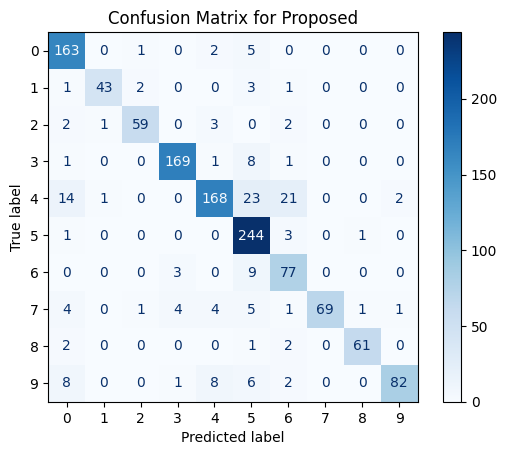

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score

# Function to calculate ACC, SEN, and SPE from confusion matrix
def calculate_metrics(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    ACC = (TN + TP) / (TN + TP + FN + FP) if (TN + TP + FN + FP) > 0 else float('nan')
    SEN = TP / (TP + FN) if (TP + FN) > 0 else float('nan')
    SPE = TN / (TN + FP) if (TN + FP) > 0 else float('nan')
    
    return ACC, SEN, SPE

# Assuming X_test and y_test are your test data and true labels

for model_name, model in models.items():
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Convert predictions to class labels if necessary
    predicted_classes = predictions.argmax(axis=1)
    
    # Convert y_test to class labels if necessary
    true_classes = y_test.argmax(axis=1) if len(y_test.shape) > 1 else y_test
    
    # Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    
    # Calculate metrics
    ACC, SEN, SPE = calculate_metrics(cm)
    
    # Compute AUC and ROC curve
    try:
        y_pred_prob = predictions[:, 1]  # Predicted probabilities for the positive class
        AUC = roc_auc_score(true_classes, y_pred_prob)
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(true_classes, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve for {model_name}")
        plt.legend(loc="lower right")
        plt.show()
        
    except ValueError:
        AUC = float('nan')  # Handle case where AUC calculation is not possible
        print(f"ROC Curve for {model_name} could not be computed due to invalid predictions.")
    
    # Calculate precision and recall
    precision = precision_score(true_classes, predicted_classes, average='weighted')
    recall = recall_score(true_classes, predicted_classes, average='weighted')
    
    # Print metrics
    print(f"Model: {model_name}")
    print(f"ACC: {ACC:.2f}")
    print(f"SEN: {SEN:.2f}")
    print(f"SPE: {SPE:.2f}")
    print(f"AUC: {AUC:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(true_classes))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


In [28]:
# save_dir = '/kaggle/working/'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

In [29]:
# for model_name, model in models.items():
#     model_save_path = os.path.join(save_dir, f'{model_name}.h5')
#     model.save(model_save_path)
#     print(f"Model {model_name} saved at {model_save_path}")